In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("DataSet/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split
# x is data frame without target variable
x = data.drop(['median_house_value'], axis = 1)
# y is target variable
y = data['median_house_value']


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
train_data = x_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9896,-122.26,38.29,10.0,969.0,160.0,482.0,180.0,6.5799,NEAR BAY,218100.0
1006,-121.75,37.69,26.0,2647.0,536.0,1422.0,522.0,3.7212,INLAND,183800.0
15484,-117.13,33.15,16.0,3907.0,671.0,1759.0,663.0,3.1776,<1H OCEAN,172600.0
998,-121.80,37.69,17.0,3956.0,639.0,2222.0,662.0,5.4324,INLAND,215500.0
4939,-118.27,33.99,30.0,504.0,140.0,529.0,123.0,1.9531,<1H OCEAN,100000.0
...,...,...,...,...,...,...,...,...,...,...
10164,-117.96,33.89,24.0,1332.0,252.0,625.0,230.0,4.4375,<1H OCEAN,334100.0
20533,-121.67,38.54,13.0,6141.0,1019.0,2553.0,967.0,4.2432,INLAND,326500.0
10263,-117.85,33.87,15.0,5078.0,806.0,2569.0,759.0,5.6549,<1H OCEAN,301900.0
16677,-120.66,35.13,41.0,2666.0,751.0,940.0,507.0,1.9653,<1H OCEAN,236100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

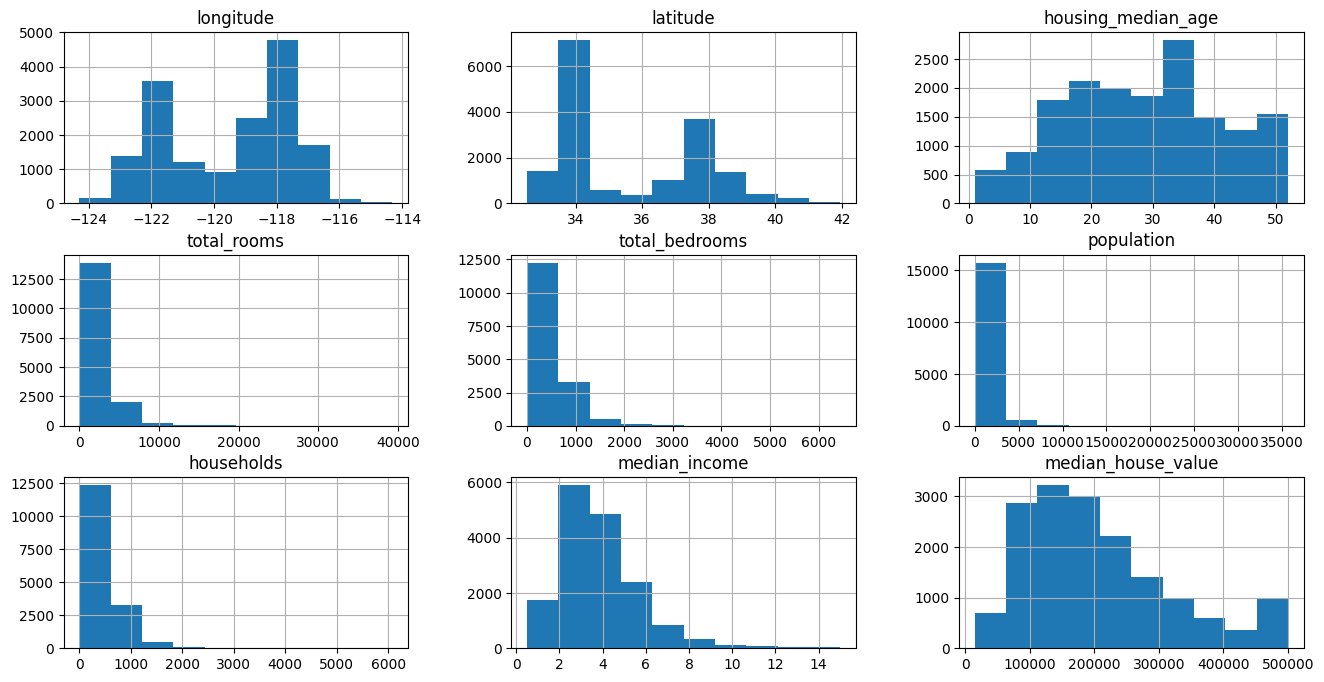

In [12]:
train_data.hist(figsize=(16,8))

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9896,-122.26,38.29,10.0,969.0,160.0,482.0,180.0,6.5799,NEAR BAY,218100.0
1006,-121.75,37.69,26.0,2647.0,536.0,1422.0,522.0,3.7212,INLAND,183800.0
15484,-117.13,33.15,16.0,3907.0,671.0,1759.0,663.0,3.1776,<1H OCEAN,172600.0
998,-121.80,37.69,17.0,3956.0,639.0,2222.0,662.0,5.4324,INLAND,215500.0
4939,-118.27,33.99,30.0,504.0,140.0,529.0,123.0,1.9531,<1H OCEAN,100000.0
...,...,...,...,...,...,...,...,...,...,...
10164,-117.96,33.89,24.0,1332.0,252.0,625.0,230.0,4.4375,<1H OCEAN,334100.0
20533,-121.67,38.54,13.0,6141.0,1019.0,2553.0,967.0,4.2432,INLAND,326500.0
10263,-117.85,33.87,15.0,5078.0,806.0,2569.0,759.0,5.6549,<1H OCEAN,301900.0
16677,-120.66,35.13,41.0,2666.0,751.0,940.0,507.0,1.9653,<1H OCEAN,236100.0


In [14]:
train_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923666,-0.107342,0.044831,0.071011,0.101150,0.059345,-0.019455,-0.047497
latitude,-0.923666,1.000000,0.010663,-0.037360,-0.070284,-0.110262,-0.075827,-0.076240,-0.144028
housing_median_age,-0.107342,0.010663,1.000000,-0.358267,-0.319075,-0.292063,-0.301871,-0.120604,0.105898
total_rooms,0.044831,-0.037360,-0.358267,1.000000,0.930706,0.858727,0.922559,0.197432,0.136691
total_bedrooms,0.071011,-0.070284,-0.319075,0.930706,1.000000,0.878698,0.982187,-0.005813,0.055240
population,0.101150,-0.110262,-0.292063,0.858727,0.878698,1.000000,0.905937,0.007013,-0.021047
households,0.059345,-0.075827,-0.301871,0.922559,0.982187,0.905937,1.000000,0.015415,0.070409
median_income,-0.019455,-0.076240,-0.120604,0.197432,-0.005813,0.007013,0.015415,1.000000,0.687640
median_house_value,-0.047497,-0.144028,0.105898,0.136691,0.055240,-0.021047,0.070409,0.687640,1.000000


<Axes: >

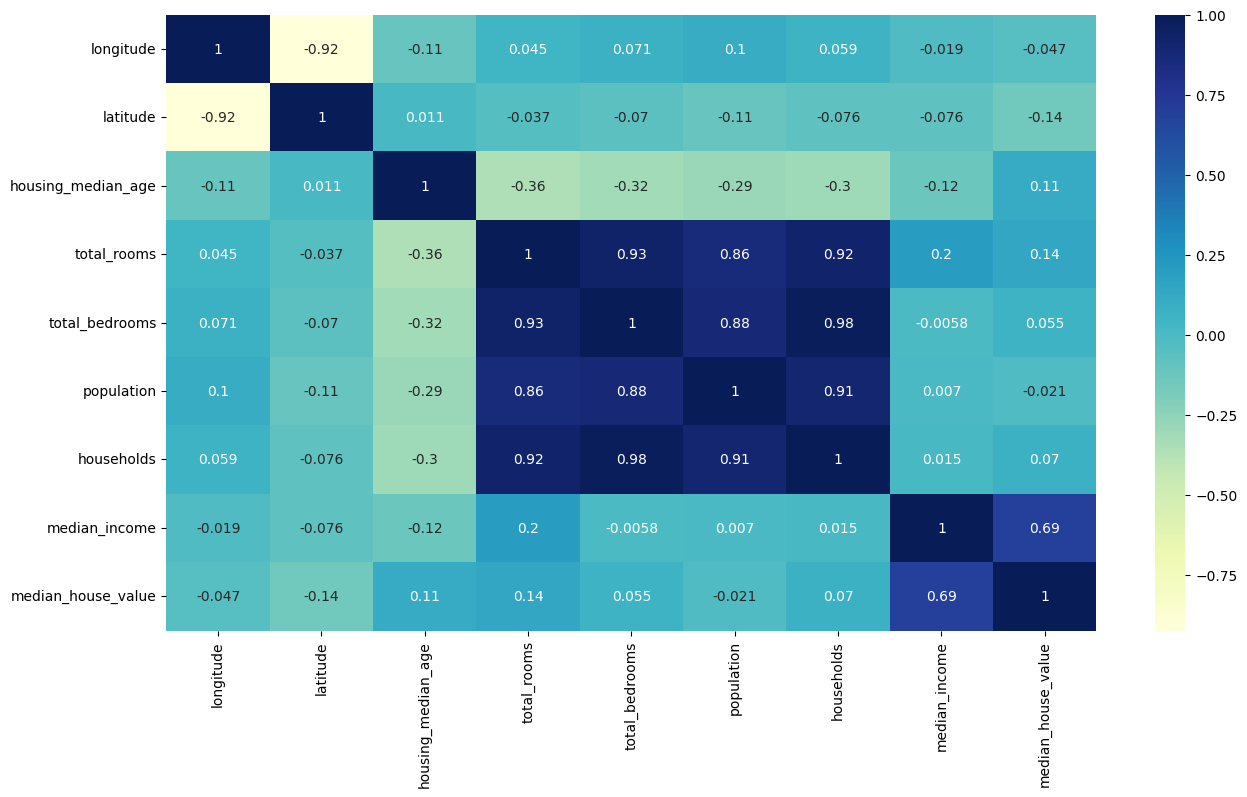

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap= "YlGnBu")

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

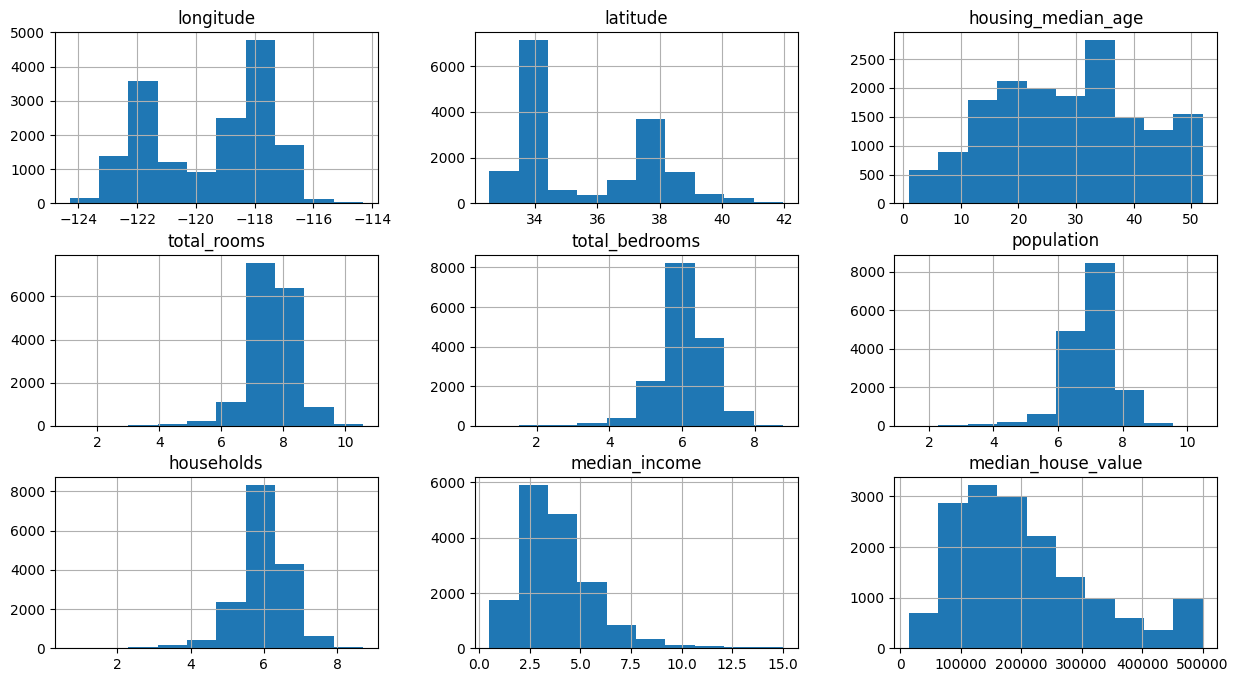

In [17]:
train_data.hist(figsize=(15,8))

In [18]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7255
INLAND        5178
NEAR OCEAN    2120
NEAR BAY      1791
ISLAND           2
Name: count, dtype: int64

In [19]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9896,-122.26,38.29,10.0,6.877296,5.081404,6.180017,5.198497,6.5799,218100.0,0,0,0,1,0
1006,-121.75,37.69,26.0,7.881560,6.285998,7.260523,6.259581,3.7212,183800.0,0,1,0,0,0
15484,-117.13,33.15,16.0,8.270781,6.510258,7.473069,6.498282,3.1776,172600.0,1,0,0,0,0
998,-121.80,37.69,17.0,8.283241,6.461468,7.706613,6.496775,5.4324,215500.0,0,1,0,0,0
4939,-118.27,33.99,30.0,6.224558,4.948760,6.272877,4.820282,1.9531,100000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10164,-117.96,33.89,24.0,7.195187,5.533389,6.439350,5.442418,4.4375,334100.0,1,0,0,0,0
20533,-121.67,38.54,13.0,8.722906,6.927558,7.845416,6.875232,4.2432,326500.0,0,1,0,0,0
10263,-117.85,33.87,15.0,8.532870,6.693324,7.851661,6.633318,5.6549,301900.0,1,0,0,0,0
16677,-120.66,35.13,41.0,7.888710,6.622736,6.846943,6.230481,1.9653,236100.0,1,0,0,0,0


<Axes: >

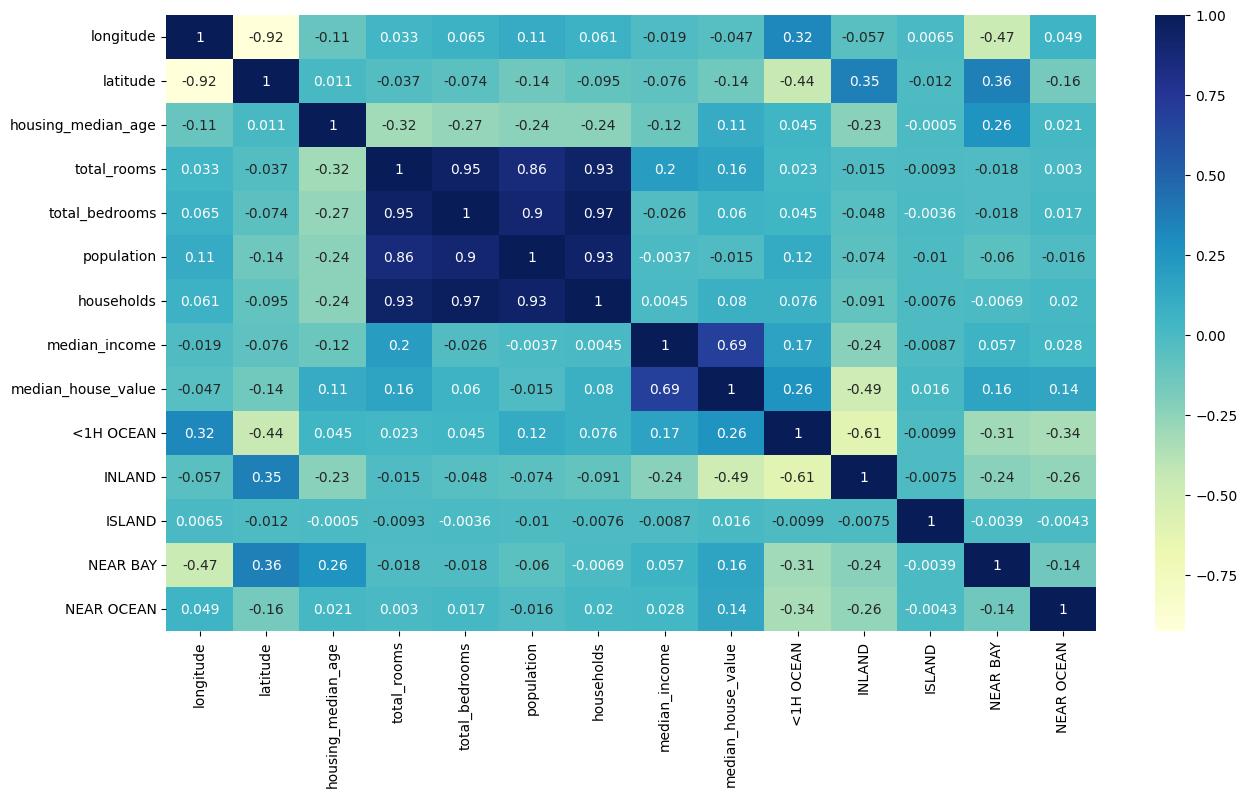

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap= "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

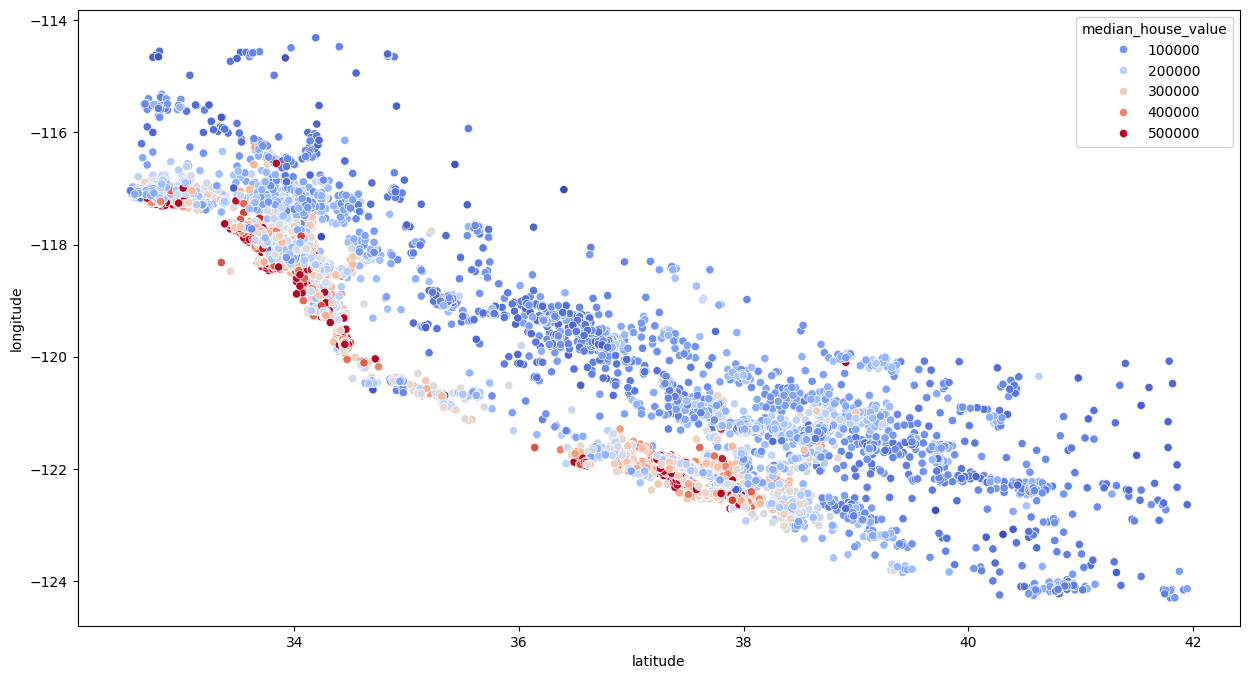

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y= "longitude", data= train_data, hue= "median_house_value", palette= "coolwarm")

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

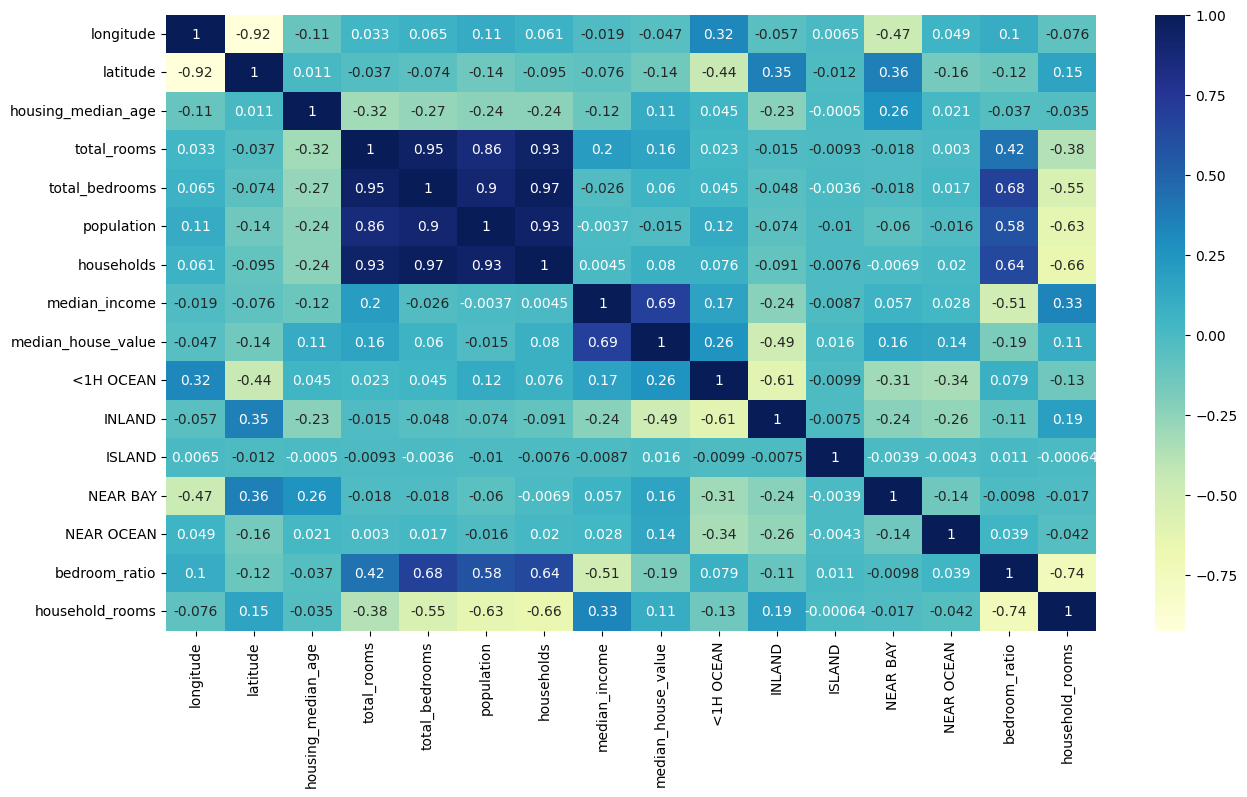

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap= "YlGnBu")

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_train_s,y_train)


LinearRegression()

In [26]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']






In [27]:
x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']
x_test_s= scaler.transform(x_test)
reg.score(x_test_s, y_test)

0.6656971529218301

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)
forest.score(x_test, y_test)


0.8139047361103727